# Baseball Analysis
##### By: Praneetha Potiny

##### The data in this analysis was taken from http://www.seanlahman.com/baseball-archive/statistics/

In [1]:
# Let's start by importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### My first question concerning this dataset is:
### 1) What possible factors are correlated with receiving pitcher awards? (excluding relief pitchers)


In [2]:
# Let's look at the awards in our dataset and see which ones we want to analyze.

player_awards = pd.read_csv('baseball/AwardsPlayers.csv')

player_awards["awardID"].unique()

array(['Pitching Triple Crown', 'Triple Crown',
       'Baseball Magazine All-Star', 'Most Valuable Player',
       'TSN All-Star', 'TSN Guide MVP',
       'TSN Major League Player of the Year', 'TSN Pitcher of the Year',
       'TSN Player of the Year', 'Rookie of the Year', 'Babe Ruth Award',
       'Lou Gehrig Memorial Award', 'World Series MVP', 'Cy Young Award',
       'Gold Glove', 'TSN Fireman of the Year', 'All-Star Game MVP',
       'Hutch Award', 'Roberto Clemente Award', 'Rolaids Relief Man Award',
       'NLCS MVP', 'ALCS MVP', 'Silver Slugger', 'Branch Rickey Award',
       'Hank Aaron Award', 'TSN Reliever of the Year',
       'Comeback Player of the Year'], dtype=object)

#### It looks like there are a lot of awards here.
####  After looking up which awards have to do with pitching, here is a list of all pitching-related awards:
<li> Pitching Triple Crown </li>
<li> Cy Young Award </li>
<li> TSN Pitcher of the Year </li>

In [7]:
# Let's find all the pitchers that won at least one award

is_pitch = player_awards['awardID'].isin(['Pitching Triple Crown', 'Cy Young Award', 'TSN Pitcher of the Year'])
awarded_pitchers = player_awards[is_pitch]['playerID'].unique()

print awarded_pitchers

['bondto01' 'heckegu01' 'radboch01' 'keefeti01' 'clarkjo01' 'rusieam01'
 'youngcy01' 'wadderu01' 'mathech01' 'johnswa01' 'alexape01' 'vaughhi01'
 'vanceda01' 'grovele01' 'gomezle01' 'waltebu01' 'fellebo01' 'newhoha01'
 'voisebi01' 'borowha01' 'lemonbo01' 'sainjo01' 'kindeel01' 'polleho01'
 'konstji01' 'roepr01' 'shantbo01' 'roberro01' 'portebo01' 'spahnwa01'
 'antonjo02' 'fordwh01' 'newcodo01' 'piercbi02' 'turlebo01' 'wynnea01'
 'jonessa02' 'lawve01' 'estrach01' 'drysddo01' 'donovdi01' 'koufasa01'
 'chancde01' 'grantmu01' 'kaatji01' 'lonboji01' 'mccormi03' 'mclaide01'
 'gibsobo01' 'cuellmi01' 'seaveto01' 'perryji01' 'mcdowsa01' 'bluevi01'
 'jenkife01' 'perryga01' 'carltst01' 'woodwi01' 'palmeji01' 'bryanro01'
 'hunteca01' 'marshmi01' 'jonesra01' 'lylesp01' 'ryanno01' 'guidrro01'
 'flanami01' 'suttebr01' 'niekrjo01' 'stonest01' 'fingero01' 'valenfe01'
 'morrija02' 'vuckope01' 'stiebda01' 'hoytla01' 'dennyjo01' 'hernawi01'
 'sutclri01' 'saberbr01' 'goodedw01' 'clemero02' 'scottmi03' 'bed

In [13]:
# Let's get the pitcher stats

pitcher_stats = pd.read_csv('baseball/Pitching.csv')

pitcher_stats['has_award'] = pitcher_stats['playerID'].isin(awarded_pitchers).astype(int)
pitcher_stats[pitcher_stats['has_award'] == 1].head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,has_award
68,bondto01,1874,1,BR2,NaN,22,32,55,55,55,...,NaN,NaN,0,NaN,NaN,440,NaN,NaN,NaN,1
88,bondto01,1875,1,HR1,NaN,19,16,40,39,37,...,NaN,NaN,0,NaN,NaN,152,NaN,NaN,NaN,1
133,bondto01,1876,1,HAR,NL,31,13,45,45,45,...,8.0,NaN,0,1623.0,0.0,164,NaN,NaN,NaN,1
167,bondto01,1877,1,BSN,NL,40,17,58,58,58,...,18.0,NaN,0,2165.0,0.0,248,NaN,NaN,NaN,1
185,bondto01,1878,1,BSN,NL,40,19,59,59,57,...,13.0,NaN,0,2159.0,1.0,222,NaN,NaN,NaN,1


### Here are some plausible factors: 
My friend, an avid baseball fan, suggested that pitchers can be measured by Earned Run Average (ERA) and winning percentage. So let's start off with that

In [23]:
# For now we only want to obtain the current variables needed for analysis

pitching_data = pitcher_stats[['playerID', 'yearID', 'lgID', 'W', 'G', 'ERA', 'has_award']]

pitching_data['win%'] = pitching_data['W']/pitching_data['G'] 

pitching_data.head()

C:\Python27\Lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,playerID,yearID,lgID,W,G,ERA,has_award,win%
0,bechtge01,1871,NaN,1,3,7.96,0,0.333333
1,brainas01,1871,NaN,12,30,4.50,0,0.400000
2,fergubo01,1871,NaN,0,1,27.00,0,0.000000
3,fishech01,1871,NaN,4,24,4.35,0,0.166667
4,fleetfr01,1871,NaN,0,1,10.00,0,0.000000


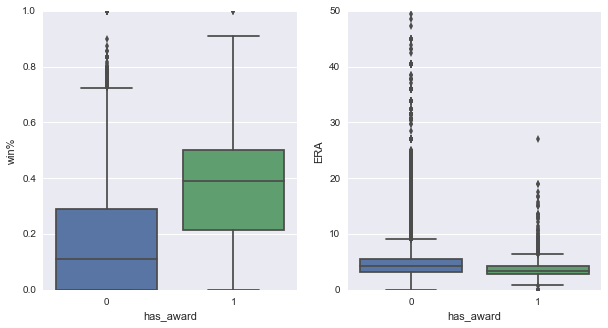

In [27]:
%matplotlib inline

f, (ax1, ax2) = plt.subplots(1, 2, sharex = True, figsize=(10,5))

plt.ylim(0, 50)

sns.boxplot(ax=ax1, x=pitching_data['has_award'], y=pitching_data['win%'])
sns.boxplot(ax=ax2, x=pitching_data['has_award'], y=pitching_data['ERA'])


#### There are plenty of outliers for winning percentage, but overall it seems to have an effect on getting an award even though there is a large variance. On the other hand, the Earned Run Average has too many outliers. It seems to not be correlated to getting an award. The inner 50% of the data for both conditions is almost in the same range.

#### Let's try analyzing Strikeouts and Shutouts. 

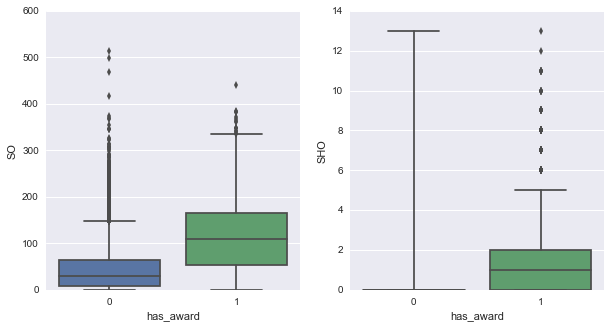

In [34]:
pitching_data = pitcher_stats[['playerID', 'yearID', 'lgID', 'SO', 'SHO', 'has_award']]

f, (ax1, ax2) = plt.subplots(1, 2, sharex = True, figsize=(10,5))

sns.boxplot(ax=ax1, x=pitching_data['has_award'], y=pitching_data['SO'])
sns.boxplot(ax=ax2, x=pitching_data['has_award'], y=pitching_data['SHO'])

In [44]:
print len(pitching_data.loc[(pitching_data['SHO'] > 0) & (pitching_data['has_award'] == 0)]), " out of "
print len(pitching_data.loc[pitching_data['has_award'] == 0]), "players"
print "do not have an award and"
print "do not have more than 0 shutouts"

8502  out of 
41415 players
do not have an award and
do not have more than 0 shutouts


##### Both variables seem to help predict award-winners:
- Players with many strikeouts and no awards are mostly outliers. The IQR for award-winning players is clearly higher when it comes to causing strikeouts and there are less outliers.
- The second graph seems really strange because you can't see the non-award-winning player data. However after calculating using the above numbers, we can see that only around <b>20%</b> of non-award-winners had more than 0 shutouts (8502/41415 = 0.207). This greatly skewed the standard deviation of the data. 

#### Different Analysis
Having or not having an award is one way to answer the question of what factors correlate to getting an award. So far, we've seen that award-winners are more likely to have higher strikeouts, shutouts, and winning percentage than non-award-winners.

Let's try answering the question in a different way. Instead of differentiating between award-winners and non-award-winners, <b>we'll differentiate between the stats of players before and after they got their award</b>. This has the possibility of removing outliers.